# Classification model with a neural network

In this exercise, you will create a model to predict hotel cancellations with a binary classifier.

## Part I. Import and exploratory analysis (EDA)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
#pip install bottleneck --upgrade

In [16]:
#pip show bottleneck

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [3]:
hotel = pd.read_csv('hotel_bookings.csv')
#hotel = hotel[:5000]

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: xlabel='is_canceled', ylabel='count'>

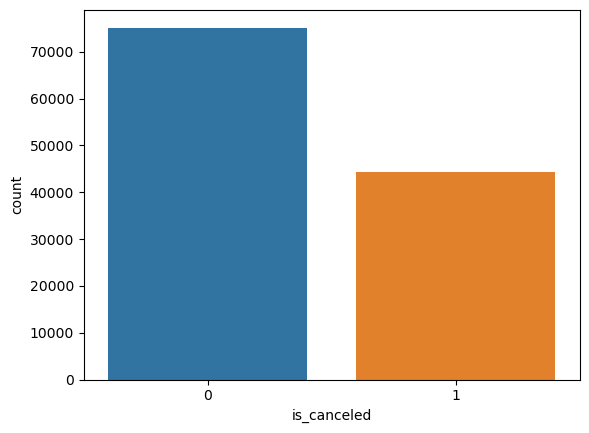

In [10]:
sns.countplot(x='is_canceled', data = hotel)

### correlation analysis

In [16]:
# Select only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = hotel.select_dtypes(include=numerics)

# Now you can calculate the correlation
new_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<Axes: >

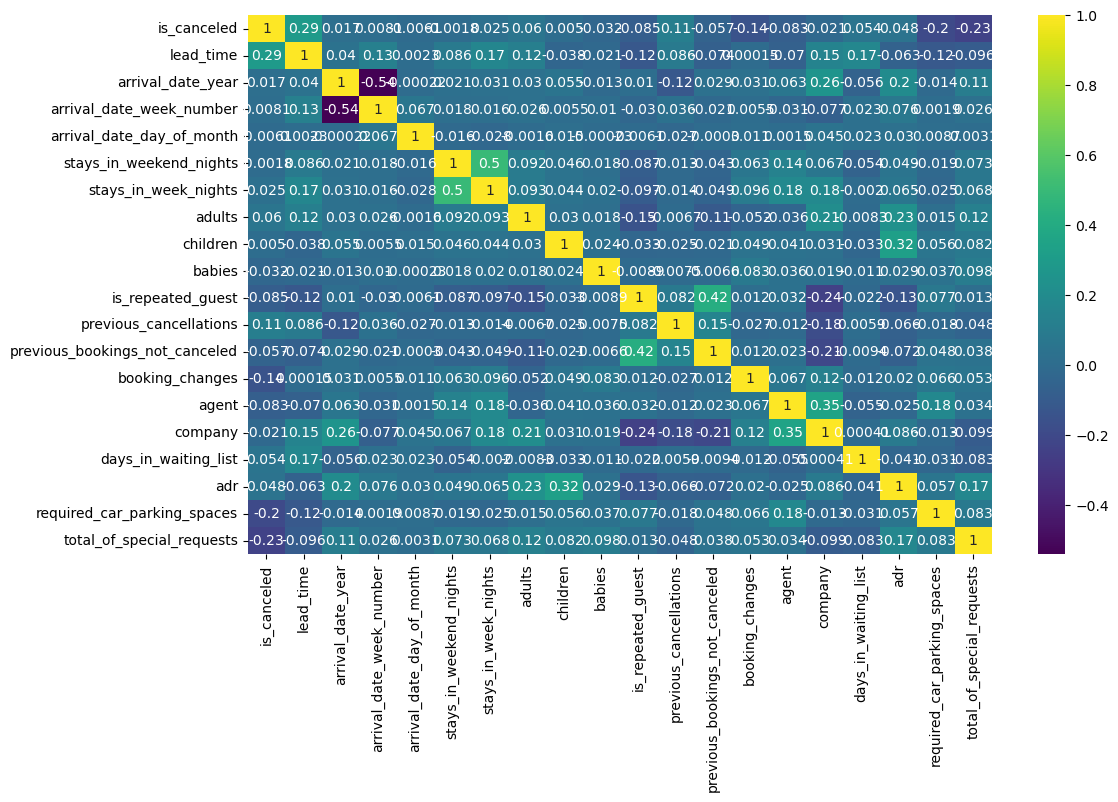

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(new_df.corr(),annot=True,cmap='viridis')

<Axes: >

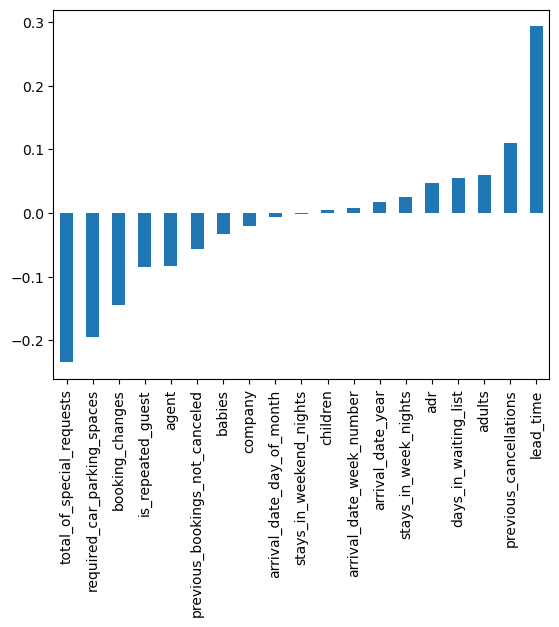

In [18]:
new_df.corr()['is_canceled'].sort_values().drop('is_canceled').plot(kind='bar')

<Axes: xlabel='is_canceled', ylabel='arrival_date_week_number'>

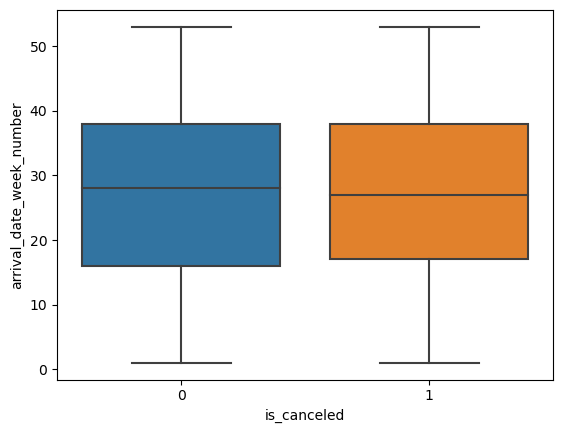

In [19]:
sns.boxplot(x='is_canceled',y= 'arrival_date_week_number',data= hotel)

In [20]:
#missing values
round(100 * hotel.isnull().sum()/
      len(hotel),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [39]:
#!pip install pandas_profiling==2.8.0

In [ ]:
from pandas_profiling import ProfileReport
#prof = ProfileReport(hotel, minimal=True)
profile = ProfileReport(hotel)
profile

## Part II. Pre-processing

In [4]:
#numerical categorization of the variable arrival_date_month
hotel['arrival_date_month'] = \
    hotel['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

In [5]:
X = hotel.copy()
y = X.pop('is_canceled')

### Pipelines

In [6]:
hotel = hotel.drop_duplicates()

In [7]:
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]

features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [8]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)

transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)


In [9]:
# stratify - make sure classes are evenlly represented across splits (correct class imbalance)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify = y, train_size=0.65)

In [10]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# Part III. Development of a basic neural network

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [11]:
#pip install --upgrade pip

In [12]:
#pip install tensorflow

In [13]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [14]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [16]:
X_train.shape

(77603, 63)

In [17]:
model = Sequential()

model.add(Dense(units=30, input_shape=input_shape, activation='relu'))
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [18]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          validation_data=(X_valid, y_valid), verbose=1
          )

Epoch 1/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - binary_accuracy: 0.7789 - loss: 0.4596 - val_binary_accuracy: 0.8097 - val_loss: 0.4079
Epoch 2/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8147 - loss: 0.3955 - val_binary_accuracy: 0.8153 - val_loss: 0.3918
Epoch 3/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8187 - loss: 0.3888 - val_binary_accuracy: 0.8180 - val_loss: 0.3879
Epoch 4/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8199 - loss: 0.3808 - val_binary_accuracy: 0.8202 - val_loss: 0.3850
Epoch 5/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8242 - loss: 0.3758 - val_binary_accuracy: 0.8221 - val_loss: 0.3836
Epoch 6/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8252 - loss: 0.3713 - val_binary_accuracy: 0.8255 - val_loss: 0.3825
Epoch 7/30
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8283 - loss: 0.3689 - val_binary_accuracy: 0.8273 - val_loss

<Axes: title={'center': 'Cross-entropy'}>

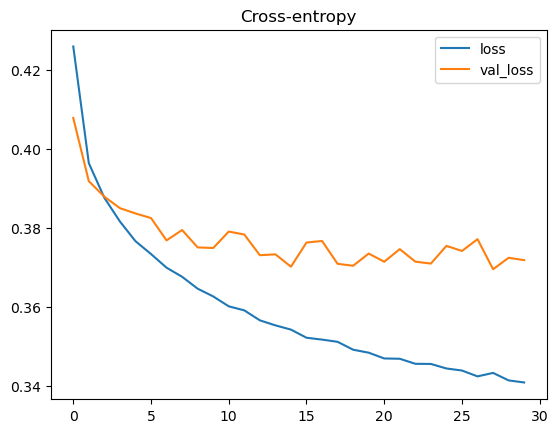

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

<Axes: title={'center': 'Accuracy'}>

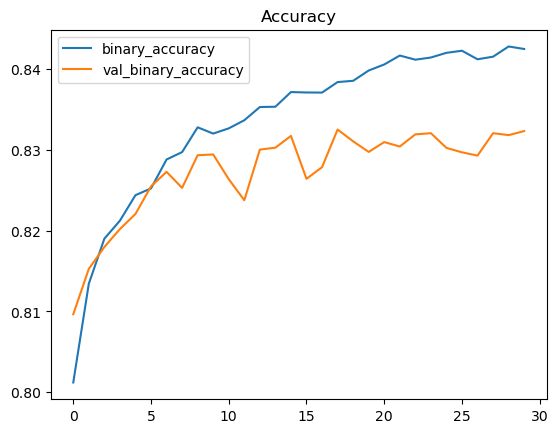

In [20]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

### Model evaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
# Get prediction probabilities
predictions = model.predict(X_valid)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_valid, y_classes))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     26308
           1       0.84      0.68      0.75     15479

    accuracy                           0.83     41787
   macro avg       0.83      0.80      0.81     41787
weighted avg       0.83      0.83      0.83     41787



In [23]:
print(confusion_matrix(y_valid,y_classes))

[[24293  2015]
 [ 4991 10488]]


## Parte IV. Overfitting y Early Stopping

In [24]:
#Model fit with epochs 300
history2 = model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_valid, y_valid), verbose=1
          )

Epoch 1/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8426 - loss: 0.3417 - val_binary_accuracy: 0.8306 - val_loss: 0.3715
Epoch 2/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8433 - loss: 0.3383 - val_binary_accuracy: 0.8324 - val_loss: 0.3719
Epoch 3/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8447 - loss: 0.3384 - val_binary_accuracy: 0.8332 - val_loss: 0.3708
Epoch 4/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8439 - loss: 0.3383 - val_binary_accuracy: 0.8300 - val_loss: 0.3749
Epoch 5/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8454 - loss: 0.3348 - val_binary_accuracy: 0.8297 - val_loss: 0.3749
Epoch 6/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8444 - loss: 0.3364 - val_binary_accuracy: 0.8307 - val_loss: 0.3753
Epoch 7/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8450 - loss: 0.3362 - val_binary_accuracy: 0.8323 - va

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8479 - loss: 0.3266 - val_binary_accuracy: 0.8302 - val_loss: 0.3801
Epoch 47/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8511 - loss: 0.3228 - val_binary_accuracy: 0.8320 - val_loss: 0.3753
Epoch 48/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8522 - loss: 0.3236 - val_binary_accuracy: 0.8291 - val_loss: 0.3803
Epoch 49/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8499 - loss: 0.3253 - val_binary_accuracy: 0.8319 - val_loss: 0.3762
Epoch 50/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8493 - loss: 0.3231 - val_binary_accuracy: 0.8308 - val_loss: 0.3809
Epoch 51/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8530 - loss: 0.3196 - val_binary_accuracy: 0.8331 - val_loss: 0.3778
Epoch 52/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8514 - loss: 0.3223 - val_binary_accuracy: 0.8305 - val_loss

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8535 - loss: 0.3177 - val_binary_accuracy: 0.8311 - val_loss: 0.3860
Epoch 92/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8552 - loss: 0.3159 - val_binary_accuracy: 0.8324 - val_loss: 0.3816
Epoch 93/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8531 - loss: 0.3166 - val_binary_accuracy: 0.8323 - val_loss: 0.3825
Epoch 94/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - binary_accuracy: 0.8537 - loss: 0.3162 - val_binary_accuracy: 0.8336 - val_loss: 0.3812
Epoch 95/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8550 - loss: 0.3164 - val_binary_accuracy: 0.8332 - val_loss: 0.3772
Epoch 96/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8547 - loss: 0.3165 - val_binary_accuracy: 0.8322 - val_loss: 0.3874
Epoch 97/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8521 - loss: 0.3224 - val_binary_accuracy: 0.8304 - val_loss

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8545 - loss: 0.3156 - val_binary_accuracy: 0.8316 - val_loss: 0.3855
Epoch 137/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8555 - loss: 0.3105 - val_binary_accuracy: 0.8306 - val_loss: 0.3879
Epoch 138/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8568 - loss: 0.3115 - val_binary_accuracy: 0.8304 - val_loss: 0.3926
Epoch 139/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8578 - loss: 0.3105 - val_binary_accuracy: 0.8294 - val_loss: 0.3905
Epoch 140/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8556 - loss: 0.3131 - val_binary_accuracy: 0.8331 - val_loss: 0.3863
Epoch 141/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8565 - loss: 0.3120 - val_binary_accuracy: 0.8333 - val_loss: 0.3882
Epoch 142/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8574 - loss: 0.3118 - val_binary_accuracy: 0.8322 - va

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8593 - loss: 0.3069 - val_binary_accuracy: 0.8338 - val_loss: 0.3910
Epoch 182/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8559 - loss: 0.3103 - val_binary_accuracy: 0.8323 - val_loss: 0.3924
Epoch 183/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8590 - loss: 0.3068 - val_binary_accuracy: 0.8317 - val_loss: 0.3927
Epoch 184/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8563 - loss: 0.3135 - val_binary_accuracy: 0.8337 - val_loss: 0.3934
Epoch 185/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8543 - loss: 0.3113 - val_binary_accuracy: 0.8328 - val_loss: 0.3894
Epoch 186/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8580 - loss: 0.3063 - val_binary_accuracy: 0.8344 - val_loss: 0.3909
Epoch 187/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.8562 - loss: 0.3095 - val_binary_accuracy: 0.8320 - va

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8590 - loss: 0.3061 - val_binary_accuracy: 0.8310 - val_loss: 0.3982
Epoch 227/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8611 - loss: 0.3009 - val_binary_accuracy: 0.8317 - val_loss: 0.3897
Epoch 228/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8600 - loss: 0.3071 - val_binary_accuracy: 0.8312 - val_loss: 0.3905
Epoch 229/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8580 - loss: 0.3081 - val_binary_accuracy: 0.8310 - val_loss: 0.3923
Epoch 230/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8580 - loss: 0.3076 - val_binary_accuracy: 0.8304 - val_loss: 0.3918
Epoch 231/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8576 - loss: 0.3064 - val_binary_accuracy: 0.8307 - val_loss: 0.3899
Epoch 232/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8589 - loss: 0.3062 - val_binary_accuracy: 0.8316 - va

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8601 - loss: 0.3039 - val_binary_accuracy: 0.8306 - val_loss: 0.3961
Epoch 272/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8612 - loss: 0.3038 - val_binary_accuracy: 0.8299 - val_loss: 0.3989
Epoch 273/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8585 - loss: 0.3062 - val_binary_accuracy: 0.8258 - val_loss: 0.4033
Epoch 274/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.8610 - loss: 0.3036 - val_binary_accuracy: 0.8300 - val_loss: 0.3957
Epoch 275/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8592 - loss: 0.3041 - val_binary_accuracy: 0.8290 - val_loss: 0.3985
Epoch 276/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8602 - loss: 0.3065 - val_binary_accuracy: 0.8314 - val_loss: 0.4005
Epoch 277/300
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8595 - loss: 0.3037 - val_binary_accuracy: 0.8306 - v

<Axes: title={'center': 'Cross-entropy'}>

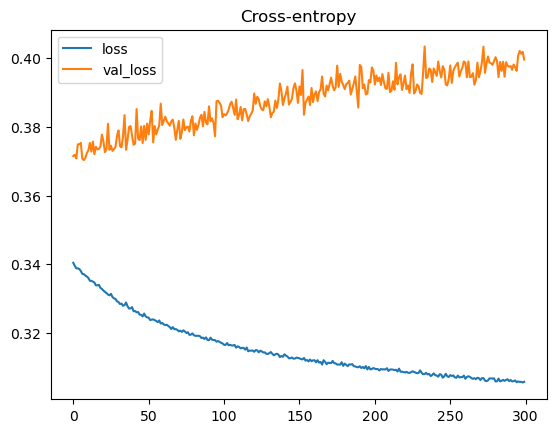

In [25]:
# grafic de loss vs val_loss
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [26]:
# Get prediction probabilities
predictions = model.predict(X_train)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_train, y_classes))

2426/2426 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     48858
           1       0.85      0.76      0.80     28745

    accuracy                           0.86     77603
   macro avg       0.86      0.84      0.85     77603
weighted avg       0.86      0.86      0.86     77603



In [27]:
# Get prediction probabilities
predictions = model.predict(X_valid)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_valid, y_classes))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     26308
           1       0.80      0.72      0.76     15479

    accuracy                           0.83     41787
   macro avg       0.82      0.81      0.81     41787
weighted avg       0.83      0.83      0.83     41787



### Early Stopping

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [29]:
model2 = Sequential()

model2.add(Dense(units=30, input_shape=input_shape, activation='relu'))
model2.add(Dense(units=256,activation='relu'))
model2.add(Dense(units=256,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))


In [30]:
early_stop = EarlyStopping(monitor='val_loss', 
                           verbose=1, 
                           patience=5,
                           min_delta=0.001,
                           restore_best_weights=True)

model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [31]:
history3 = model2.fit(x=X_train, 
           y=y_train, 
           epochs=80,
           batch_size=512,
           validation_data=(X_valid, y_valid), 
           verbose=1,
           callbacks=[early_stop]
           )

Epoch 1/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - binary_accuracy: 0.7466 - loss: 0.5062 - val_binary_accuracy: 0.8056 - val_loss: 0.4164
Epoch 2/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.8090 - loss: 0.4096 - val_binary_accuracy: 0.8140 - val_loss: 0.4023
Epoch 3/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.8180 - loss: 0.3943 - val_binary_accuracy: 0.8162 - val_loss: 0.3938
Epoch 4/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.8194 - loss: 0.3872 - val_binary_accuracy: 0.8157 - val_loss: 0.3950
Epoch 5/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - binary_accuracy: 0.8238 - loss: 0.3835 - val_binary_accuracy: 0.8244 - val_loss: 0.3836
Epoch 6/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - binary_accuracy: 0.8297 - loss: 0.3701 - val_binary_accuracy: 0.8260 - val_loss: 0.3801
Epoch 7/80
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - binary_accuracy: 0.8302 - loss: 0.3696 - val_binary_accuracy: 0.8258 - val_loss: 0.3796

In [32]:
# Get prediction probabilities
predictions2 = model2.predict(X_valid)

# Convert probabilities to binary class labels (0 or 1)
y_classes2 = (predictions2 > 0.5).astype("int32")

print(classification_report(y_valid, y_classes2))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     26308
           1       0.82      0.71      0.76     15479

    accuracy                           0.83     41787
   macro avg       0.83      0.81      0.82     41787
weighted avg       0.83      0.83      0.83     41787



<Axes: title={'center': 'Cross-entropy'}>

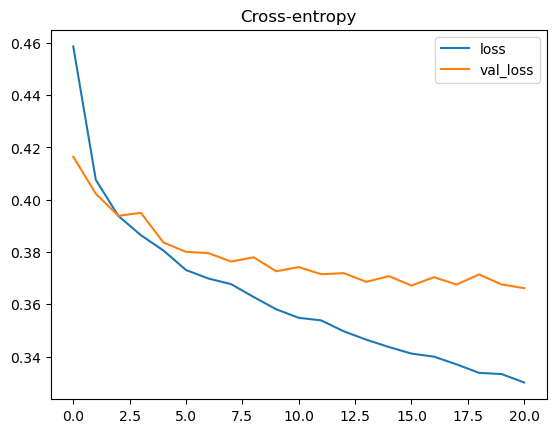

In [33]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

## Parte V. Dropout y BatchNormalization

In [34]:
from tensorflow.keras.layers import BatchNormalization

model3 = Sequential()

model3.add(BatchNormalization(input_shape=input_shape))

model3.add(Dense(units=256,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(units=256,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))


model3.add(Dense(units=1,
                activation='sigmoid'))


In [35]:
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [36]:
history4 = model3.fit(
           X_train, y_train,
           validation_data=(X_valid, y_valid),
           batch_size=512,
           epochs=150,
           callbacks=[early_stop],
           )

Epoch 1/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - binary_accuracy: 0.7353 - loss: 0.5430 - val_binary_accuracy: 0.8008 - val_loss: 0.4456
Epoch 2/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - binary_accuracy: 0.7977 - loss: 0.4283 - val_binary_accuracy: 0.8095 - val_loss: 0.4054
Epoch 3/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - binary_accuracy: 0.8051 - loss: 0.4125 - val_binary_accuracy: 0.8190 - val_loss: 0.3973
Epoch 4/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - binary_accuracy: 0.8098 - loss: 0.4036 - val_binary_accuracy: 0.8193 - val_loss: 0.3926
Epoch 5/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - binary_accuracy: 0.8128 - loss: 0.3980 - val_binary_accuracy: 0.8208 - val_loss: 0.3902
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


<Axes: title={'center': 'Accuracy'}>

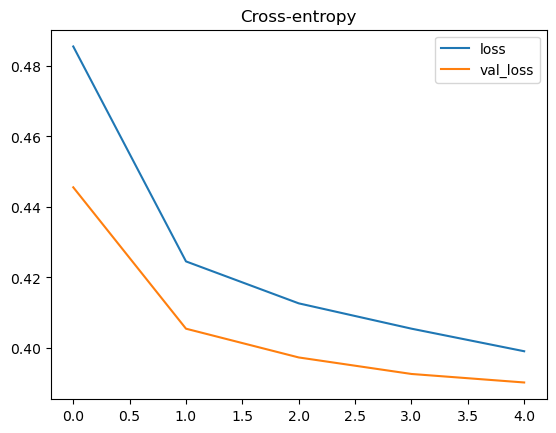

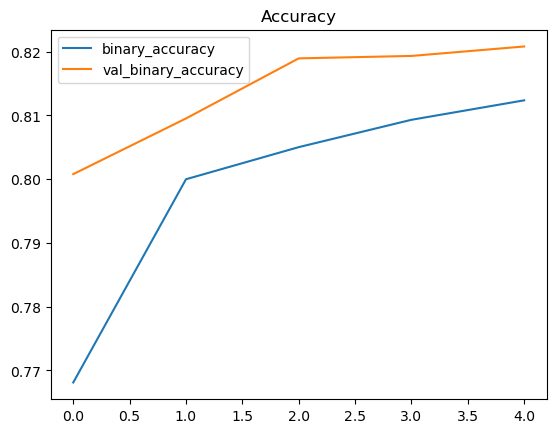

In [37]:
history_df = pd.DataFrame(history4.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [38]:
# Get prediction probabilities
predictions3 = model3.predict(X_valid)

# Convert probabilities to binary class labels (0 or 1)
y_classes3 = (predictions3 > 0.5).astype("int32")

print(classification_report(y_valid, y_classes3))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     26308
           1       0.88      0.54      0.67     15479

    accuracy                           0.80     41787
   macro avg       0.83      0.75      0.76     41787
weighted avg       0.82      0.80      0.79     41787

